In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/Mahe/Dropbox/MATLAB_Assignments/Datasets/diabetes/diabetes.csv')
df.head() # 0 - Not diabetic, 1 - Diabeteic
#All the participants in the data sets were women

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)
Outcome
0    500
1    268
dtype: int64


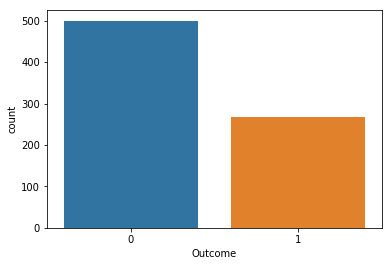

In [4]:
print(df.shape)
#768 samples, 9 features
print(df.groupby('Outcome').size())
sns.countplot(df['Outcome'], label = 'Count')
#Hence 500 with no diabetes and 268 with diabetes

In [5]:
print(df.isnull().sum())
#Checking for null values in the data. All 0's indicate that the data is CLEAN and good to use.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
#Studying the data in detail
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Studying the correlation between the elements
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
#Splitting the data:
X = df.iloc[:,:-1]
y = df['Outcome']
features = df.columns[:-1]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (576, 8)
Shape of X_test: (192, 8)
Shape of y_train: (576,)
Shape of y_test: (192,)


In [9]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [10]:
#Using default parameters of RandomForest
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train,y_train)
print('Accuracy of train data is %04f' % (clf.score(X_train,y_train)*100) )
print('Accuracy of test data is %04f' % (clf.score(X_test, y_test)*100))

Accuracy of train data is 98.263889
Accuracy of test data is 72.916667


In [11]:
#Limiting the number of parameters to 3
clf = RandomForestClassifier(max_depth=3, n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
print('Accuracy of train data is %04f' % (clf.score(X_train,y_train)*100) )
print('Accuracy of test data is %04f' % (clf.score(X_test, y_test)*100))
#Accuracy DECREASED. Iterating with 4.
clf = RandomForestClassifier(max_depth=4, n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
print('Accuracy of train data is %04f' % (clf.score(X_train,y_train)*100) )
print('Accuracy of test data is %04f' % (clf.score(X_test, y_test)*100))
#Improvement on train data but worsened on test data. Iterating with 5.
clf = RandomForestClassifier(max_depth=5, n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
print('Accuracy of train data is %04f' % (clf.score(X_train,y_train)*100) )
print('Accuracy of test data is %04f' % (clf.score(X_test, y_test)*100))
#Improvement.
clf = RandomForestClassifier(max_depth=6, n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
print('Accuracy of train data is %04f' % (clf.score(X_train,y_train)*100) )
print('Accuracy of test data is %04f' % (clf.score(X_test, y_test)*100))
#With max_depth=6, test data accuracy is obtained as 75 which is the highest but since train data accuracy is low and it is still lower than 76%, we will use default parameters.

Accuracy of train data is 76.736111
Accuracy of test data is 75.000000
Accuracy of train data is 80.729167
Accuracy of test data is 77.083333
Accuracy of train data is 83.333333
Accuracy of test data is 77.083333
Accuracy of train data is 87.847222
Accuracy of test data is 70.833333


Accuracy of train data is 98.263889
Accuracy of test data is 72.916667


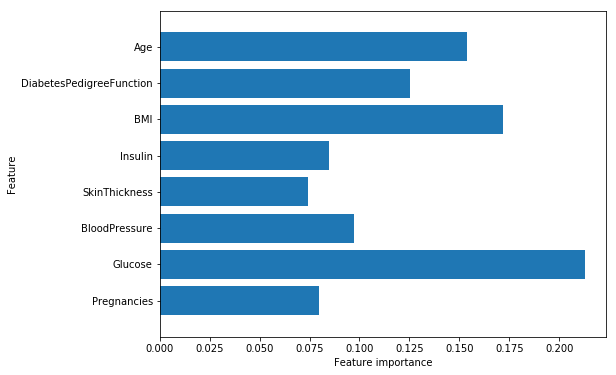

In [12]:
#Resetting the CLF to default
#Using default parameters of RandomForest
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train,y_train)
print('Accuracy of train data is %04f' % (clf.score(X_train,y_train)*100) )
print('Accuracy of test data is %04f' % (clf.score(X_test, y_test)*100))
plot_feature_importances_diabetes(clf)

Accuracy of train data is 98.784722
Accuracy of test data is 71.354167


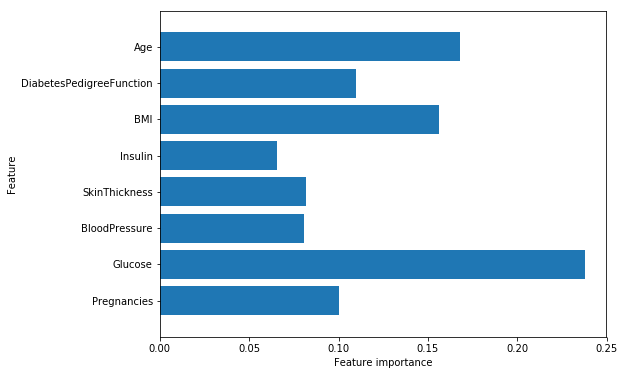

In [13]:
#Let us compare the accuracy to scaled data
ss = StandardScaler()
ss.fit(X)
X_s = ss.transform(X)
X_s_train, X_s_test, y_train, y_test = train_test_split(X,y)
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_s_train,y_train)
print('Accuracy of train data is %04f' % (clf.score(X_s_train,y_train)*100) )
print('Accuracy of test data is %04f' % (clf.score(X_s_test, y_test)*100))
plot_feature_importances_diabetes(clf)
#Accuracy decreases slightly, so not a good idea to scale the data for RF in this case.

In [32]:
#So, using the random forest algorithm, we have achived an accuracy of about 77.5%. According to it, Glucose, BMI and Number of Pregnancies are the top3 contributing factors to diabetes.
#Testing the data
Testing_y = clf.predict_proba(np.array([4, 150, 75, 24, 34, 89, 0.47, 20]).reshape(1,-1))
Testing_y
#0.7 not diabetic.

array([[ 0.7,  0.3]])